In [1]:
#!pip install beautifulsoup4

In [2]:
## Importing Libraries
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import string
import spacy
import re
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 
import seaborn as sns

#### Extracting reviews from Amazon for Oneplus Phone

In [3]:
link = 'https://www.amazon.in/Test-Exclusive-545/product-reviews/B077Q42GDF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [4]:
page = requests.get(link)

In [5]:
page

<Response [200]>

In [6]:
soup = bs(page.content, 'html.parser')

In [7]:
text = soup.find_all('span', {'data-hook': 'review-body'})

In [8]:
text

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   Good:<br/>Performance<br/>Looks<br/>Main Camera<br/><br/>Average :<br/>Ultra wide, Telephoto and selfie camera<br/>Battery life<br/><br/>Bad:<br/>Heats quite a bit<br/>Weight balance<br/><br/>Ugly :<br/>Display. Black bar, green tint, non-uniform colors at lower brightness, black crush even after update.
 </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   Received my OnePlus 8 pro (12GB+256GB) today and it is an absolute beast  thanks to Amazon for fast delivery and also 3k discount using SBI credit card.<br/><br/>Pros<br/>Snapdragon 865 best chipset available for Android<br/>Stunning 120hz display<br/>Excellent battery life<br/>30watt warp charge<br/>Wireless charging<br/>IP68 rating<br/>Improved camera quality<br/>5g support<br/>UFS 3.0 storage<br/>Best in class Android skin (Oxygen OS)<br/>No display issues in Indian units<br/>C

In [9]:
len(text)

10

In [10]:
rev_text = []
for i in range(0, len(text)):
    rev_text.append(text[i].get_text())

rev_text

['\n\n  Good:PerformanceLooksMain CameraAverage :Ultra wide, Telephoto and selfie cameraBattery lifeBad:Heats quite a bitWeight balanceUgly :Display. Black bar, green tint, non-uniform colors at lower brightness, black crush even after update.\n\n',
 '\n\n  Received my OnePlus 8 pro (12GB+256GB) today and it is an absolute beast  thanks to Amazon for fast delivery and also 3k discount using SBI credit card.ProsSnapdragon 865 best chipset available for AndroidStunning 120hz displayExcellent battery life30watt warp chargeWireless chargingIP68 ratingImproved camera quality5g supportUFS 3.0 storageBest in class Android skin (Oxygen OS)No display issues in Indian unitsConsphotochrom filter disabled ( I really wanted to try that one )Curved edges cause accidental touches ( I hope they will fix it in new update)Overall a true flagship from OnePlus\n\n',
 "\n\n  Don't buy this phone!oneplus company released fake updates for color filter camera in which camera is useless and not taking images l

In [11]:
rev_text[:] = [text.lstrip('\n') for text in rev_text]
rev_text

['  Good:PerformanceLooksMain CameraAverage :Ultra wide, Telephoto and selfie cameraBattery lifeBad:Heats quite a bitWeight balanceUgly :Display. Black bar, green tint, non-uniform colors at lower brightness, black crush even after update.\n\n',
 '  Received my OnePlus 8 pro (12GB+256GB) today and it is an absolute beast  thanks to Amazon for fast delivery and also 3k discount using SBI credit card.ProsSnapdragon 865 best chipset available for AndroidStunning 120hz displayExcellent battery life30watt warp chargeWireless chargingIP68 ratingImproved camera quality5g supportUFS 3.0 storageBest in class Android skin (Oxygen OS)No display issues in Indian unitsConsphotochrom filter disabled ( I really wanted to try that one )Curved edges cause accidental touches ( I hope they will fix it in new update)Overall a true flagship from OnePlus\n\n',
 "  Don't buy this phone!oneplus company released fake updates for color filter camera in which camera is useless and not taking images like before.I

In [12]:
rev_text[:] = [text.rstrip('\n') for text in rev_text]
rev_text

['  Good:PerformanceLooksMain CameraAverage :Ultra wide, Telephoto and selfie cameraBattery lifeBad:Heats quite a bitWeight balanceUgly :Display. Black bar, green tint, non-uniform colors at lower brightness, black crush even after update.',
 '  Received my OnePlus 8 pro (12GB+256GB) today and it is an absolute beast  thanks to Amazon for fast delivery and also 3k discount using SBI credit card.ProsSnapdragon 865 best chipset available for AndroidStunning 120hz displayExcellent battery life30watt warp chargeWireless chargingIP68 ratingImproved camera quality5g supportUFS 3.0 storageBest in class Android skin (Oxygen OS)No display issues in Indian unitsConsphotochrom filter disabled ( I really wanted to try that one )Curved edges cause accidental touches ( I hope they will fix it in new update)Overall a true flagship from OnePlus',
 "  Don't buy this phone!oneplus company released fake updates for color filter camera in which camera is useless and not taking images like before.Its total

In [13]:
df = pd.DataFrame(rev_text)
df.columns = ['Reviews']
df.head()

,Reviews
0,Good:PerformanceLooksMain CameraAverage :Ult...
1,Received my OnePlus 8 pro (12GB+256GB) today...
2,Don't buy this phone!oneplus company release...
3,Recieved a defective display
4,The phone was good but the display was so BA...


In [14]:
link1 = 'https://www.amazon.in/Test-Exclusive-545/product-reviews/B077Q42GDF/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2'

In [15]:
page1 = requests.get(link1)

In [16]:
page1

<Response [200]>

In [17]:
soup1 = bs(page1.content, 'html.parser')

In [18]:
text2 = soup1.find_all('span', {"data-hook" : "review-body"})
text2

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   So happy to write a review, because this device according to me is overhyped for sure.<br/>Pros :<br/>1) Design : It's premium and sandwich design is comfortable to hold.<br/>2) Speaker : Sound quality is superior then competitive products.<br/>3) Battery : If you are in a rush, 10-15 min of charge will surely give you an hour of usage (that's deal breaker) in emergency.<br/>4) 120hz : 120hz refresh rate makes a difference (I'm talking about visible difference).<br/>5) Color options : It's decent &amp; attractive cool colors.<br/>6) Rear camera : It has massive improvement ,that can match some good high end flagship smartphones, with competitive pricing.<br/>7) Face Security : Face unlock is super handy and useful ( also doesn't work when your eyes are closed).<br/><br/>Cons :<br/>1) Display : Display issues - Black crush , punch hole band is abnormal, but still can be neglected, but not the 

In [19]:
rev_text2 = []
for i in range(0, len(text2)):
    rev_text2.append(text2[i].get_text())

rev_text2

["\n\n  So happy to write a review, because this device according to me is overhyped for sure.Pros :1) Design : It's premium and sandwich design is comfortable to hold.2) Speaker : Sound quality is superior then competitive products.3) Battery : If you are in a rush, 10-15 min of charge will surely give you an hour of usage (that's deal breaker) in emergency.4) 120hz : 120hz refresh rate makes a difference (I'm talking about visible difference).5) Color options : It's decent & attractive cool colors.6) Rear camera : It has massive improvement ,that can match some good high end flagship smartphones, with competitive pricing.7) Face Security : Face unlock is super handy and useful ( also doesn't work when your eyes are closed).Cons :1) Display : Display issues - Black crush , punch hole band is abnormal, but still can be neglected, but not the brightness issue , using this device in dark environment is lethal, die to brightness level (at lowest it can damage your eyesight).2) Front camer

In [20]:
rev_text2[:] = [text.lstrip('\n') for text in rev_text2]
rev_text2

["  So happy to write a review, because this device according to me is overhyped for sure.Pros :1) Design : It's premium and sandwich design is comfortable to hold.2) Speaker : Sound quality is superior then competitive products.3) Battery : If you are in a rush, 10-15 min of charge will surely give you an hour of usage (that's deal breaker) in emergency.4) 120hz : 120hz refresh rate makes a difference (I'm talking about visible difference).5) Color options : It's decent & attractive cool colors.6) Rear camera : It has massive improvement ,that can match some good high end flagship smartphones, with competitive pricing.7) Face Security : Face unlock is super handy and useful ( also doesn't work when your eyes are closed).Cons :1) Display : Display issues - Black crush , punch hole band is abnormal, but still can be neglected, but not the brightness issue , using this device in dark environment is lethal, die to brightness level (at lowest it can damage your eyesight).2) Front camera (l

In [21]:
rev_text2[:] = [text.rstrip('\n') for text in rev_text2]
rev_text2

["  So happy to write a review, because this device according to me is overhyped for sure.Pros :1) Design : It's premium and sandwich design is comfortable to hold.2) Speaker : Sound quality is superior then competitive products.3) Battery : If you are in a rush, 10-15 min of charge will surely give you an hour of usage (that's deal breaker) in emergency.4) 120hz : 120hz refresh rate makes a difference (I'm talking about visible difference).5) Color options : It's decent & attractive cool colors.6) Rear camera : It has massive improvement ,that can match some good high end flagship smartphones, with competitive pricing.7) Face Security : Face unlock is super handy and useful ( also doesn't work when your eyes are closed).Cons :1) Display : Display issues - Black crush , punch hole band is abnormal, but still can be neglected, but not the brightness issue , using this device in dark environment is lethal, die to brightness level (at lowest it can damage your eyesight).2) Front camera (l

In [22]:
df2 = pd.DataFrame(rev_text2)
df2.columns = ['Reviews']



In [23]:
df2.head()

,Reviews
0,"So happy to write a review, because this dev..."
1,After waiting for almost one month I got my ...
2,"Everyone knows it's an amazing phone, I'll j..."
3,There are many issues with the phone.1) 120h...
4,I have faced the same issues reported by man...


In [24]:
data = df.append(df2, ignore_index = True)

In [25]:
data.head()

,Reviews
0,Good:PerformanceLooksMain CameraAverage :Ult...
1,Received my OnePlus 8 pro (12GB+256GB) today...
2,Don't buy this phone!oneplus company release...
3,Recieved a defective display
4,The phone was good but the display was so BA...


In [26]:
### Cleaning Text
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub('Your browser does not support HTML5 video', '', text)
   
    return text

In [27]:
data['Reviews'] = data['Reviews'].apply(clean_text)

In [28]:
data.head()

,Reviews
0,Good:PerformanceLooksMain CameraAverage :Ult...
1,Received my OnePlus 8 pro (12GB+256GB) today...
2,Don't buy this phone!oneplus company release...
3,Recieved a defective display
4,The phone was good but the display was so BA...


In [29]:
data = [Reviews.strip() for Reviews in data.Reviews]
data

['Good:PerformanceLooksMain CameraAverage :Ultra wide, Telephoto and selfie cameraBattery lifeBad:Heats quite a bitWeight balanceUgly :Display. Black bar, green tint, non-uniform colors at lower brightness, black crush even after update.',
 'Received my OnePlus 8 pro (12GB+256GB) today and it is an absolute beast  thanks to Amazon for fast delivery and also 3k discount using SBI credit card.ProsSnapdragon 865 best chipset available for AndroidStunning 120hz displayExcellent battery life30watt warp chargeWireless chargingIP68 ratingImproved camera quality5g supportUFS 3.0 storageBest in class Android skin (Oxygen OS)No display issues in Indian unitsConsphotochrom filter disabled ( I really wanted to try that one )Curved edges cause accidental touches ( I hope they will fix it in new update)Overall a true flagship from OnePlus',
 "Don't buy this phone!oneplus company released fake updates for color filter camera in which camera is useless and not taking images like before.Its totally use

In [30]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [31]:
from nltk import tokenize
reviews = tokenize.sent_tokenize(" ".join(data))
reviews[5:15] 

["It wasn't expected from one plus,I am facing the same issue which is experienced by most users on one plus 8 pro ,something which is called black bar issue near front facing camera when brightness of the phone is set to low,really not expected one plus.",
 'There is an uneven brightness issue where the green tint is easily visible, uneven colour calibration is present.Had invested in a wrong premium phone.',
 'Seeking some solution from oneplus or amazon after buying it on 17th June.',
 'Very sad to oneplus for the first time.',
 'Not happy.',
 'I am a long time customer of oneplus phones and since last 3 years I have been using oneplus 5 and that phone is as good as new.',
 "Here are some of the issues I am facing with the new onplus 8 pro.- Battery - The phone doesn't last one day with full charge.",
 'I dont play any games, my phone usage is mainly social media, instagram,facebook,reddit, twitter and bunch of other photo edit tools like lightroom and snapseed.',
 'If I charge full

In [32]:
review_df = pd.DataFrame(reviews, columns=['Reviews'])
review_df

,Reviews
0,Good:PerformanceLooksMain CameraAverage :Ultra...
1,"Black bar, green tint, non-uniform colors at l..."
2,Received my OnePlus 8 pro (12GB+256GB) today a...
3,Recieved a defective display The phone was goo...
4,Thanks OnePlus for the amazing experience.
...,...
90,Display Quality2.
91,Smooth Videos (MEMC technology)3.
92,120 Hz refresh rate (Due to my first experienc...
93,"SpeedFinally, I replaced the phone, and the se..."


#### Emotion Mining

In [33]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [34]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [35]:
review_df['Score'] = review_df['Reviews'].apply(calculate_sentiment) 
review_df

,Reviews,Score
0,Good:PerformanceLooksMain CameraAverage :Ultra...,3
1,"Black bar, green tint, non-uniform colors at l...",0
2,Received my OnePlus 8 pro (12GB+256GB) today a...,1
3,Recieved a defective display The phone was goo...,2
4,Thanks OnePlus for the amazing experience.,6
...,...,...
90,Display Quality2.,0
91,Smooth Videos (MEMC technology)3.,0
92,120 Hz refresh rate (Due to my first experienc...,0
93,"SpeedFinally, I replaced the phone, and the se...",5


In [36]:
pos_review = review_df[review_df['Score']>0]
pos_review

,Reviews,Score
0,Good:PerformanceLooksMain CameraAverage :Ultra...,3
2,Received my OnePlus 8 pro (12GB+256GB) today a...,1
3,Recieved a defective display The phone was goo...,2
4,Thanks OnePlus for the amazing experience.,6
5,"It wasn't expected from one plus,I am facing t...",1
7,Seeking some solution from oneplus or amazon a...,1
9,Not happy.,3
10,I am a long time customer of oneplus phones an...,3
12,"I dont play any games, my phone usage is mainl...",2
22,Now whats the use if I cant record a video eve...,9


In [37]:
neg_review = review_df[review_df['Score']<0]
neg_review

,Reviews,Score
6,There is an uneven brightness issue where the ...,-1
8,Very sad to oneplus for the first time.,-2
16,"Yes war charging is faster, but the charge whi...",-1
19,Btw I have removed 120hz refresh rate on the f...,-1
29,Fingerprint lockscreen works mostly 70% of the...,-2
38,"Also, the camera bump is quite prominent.- I d...",-1
43,This mobile doesn't come with duel 5g mode.Eve...,-3
51,Even little dust or wet fingertips will reject...,-4
52,It's just for show now.6) Durability : Curved ...,-2
57,With 120hz refersh rate and 2k resolution conf...,-7


In [38]:
review_df['index'] = range(0,len(review_df))

<AxesSubplot:xlabel='index', ylabel='Score'>

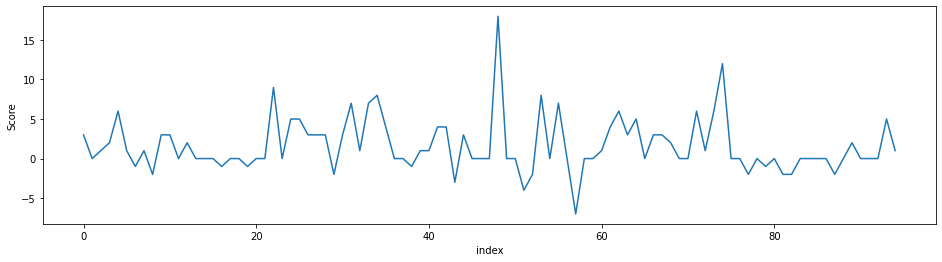

In [39]:
plt.figure(figsize=(16, 4))
sns.lineplot(y= 'Score', x='index', data= review_df)

In [40]:
rev_text = ' '.join(data)

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

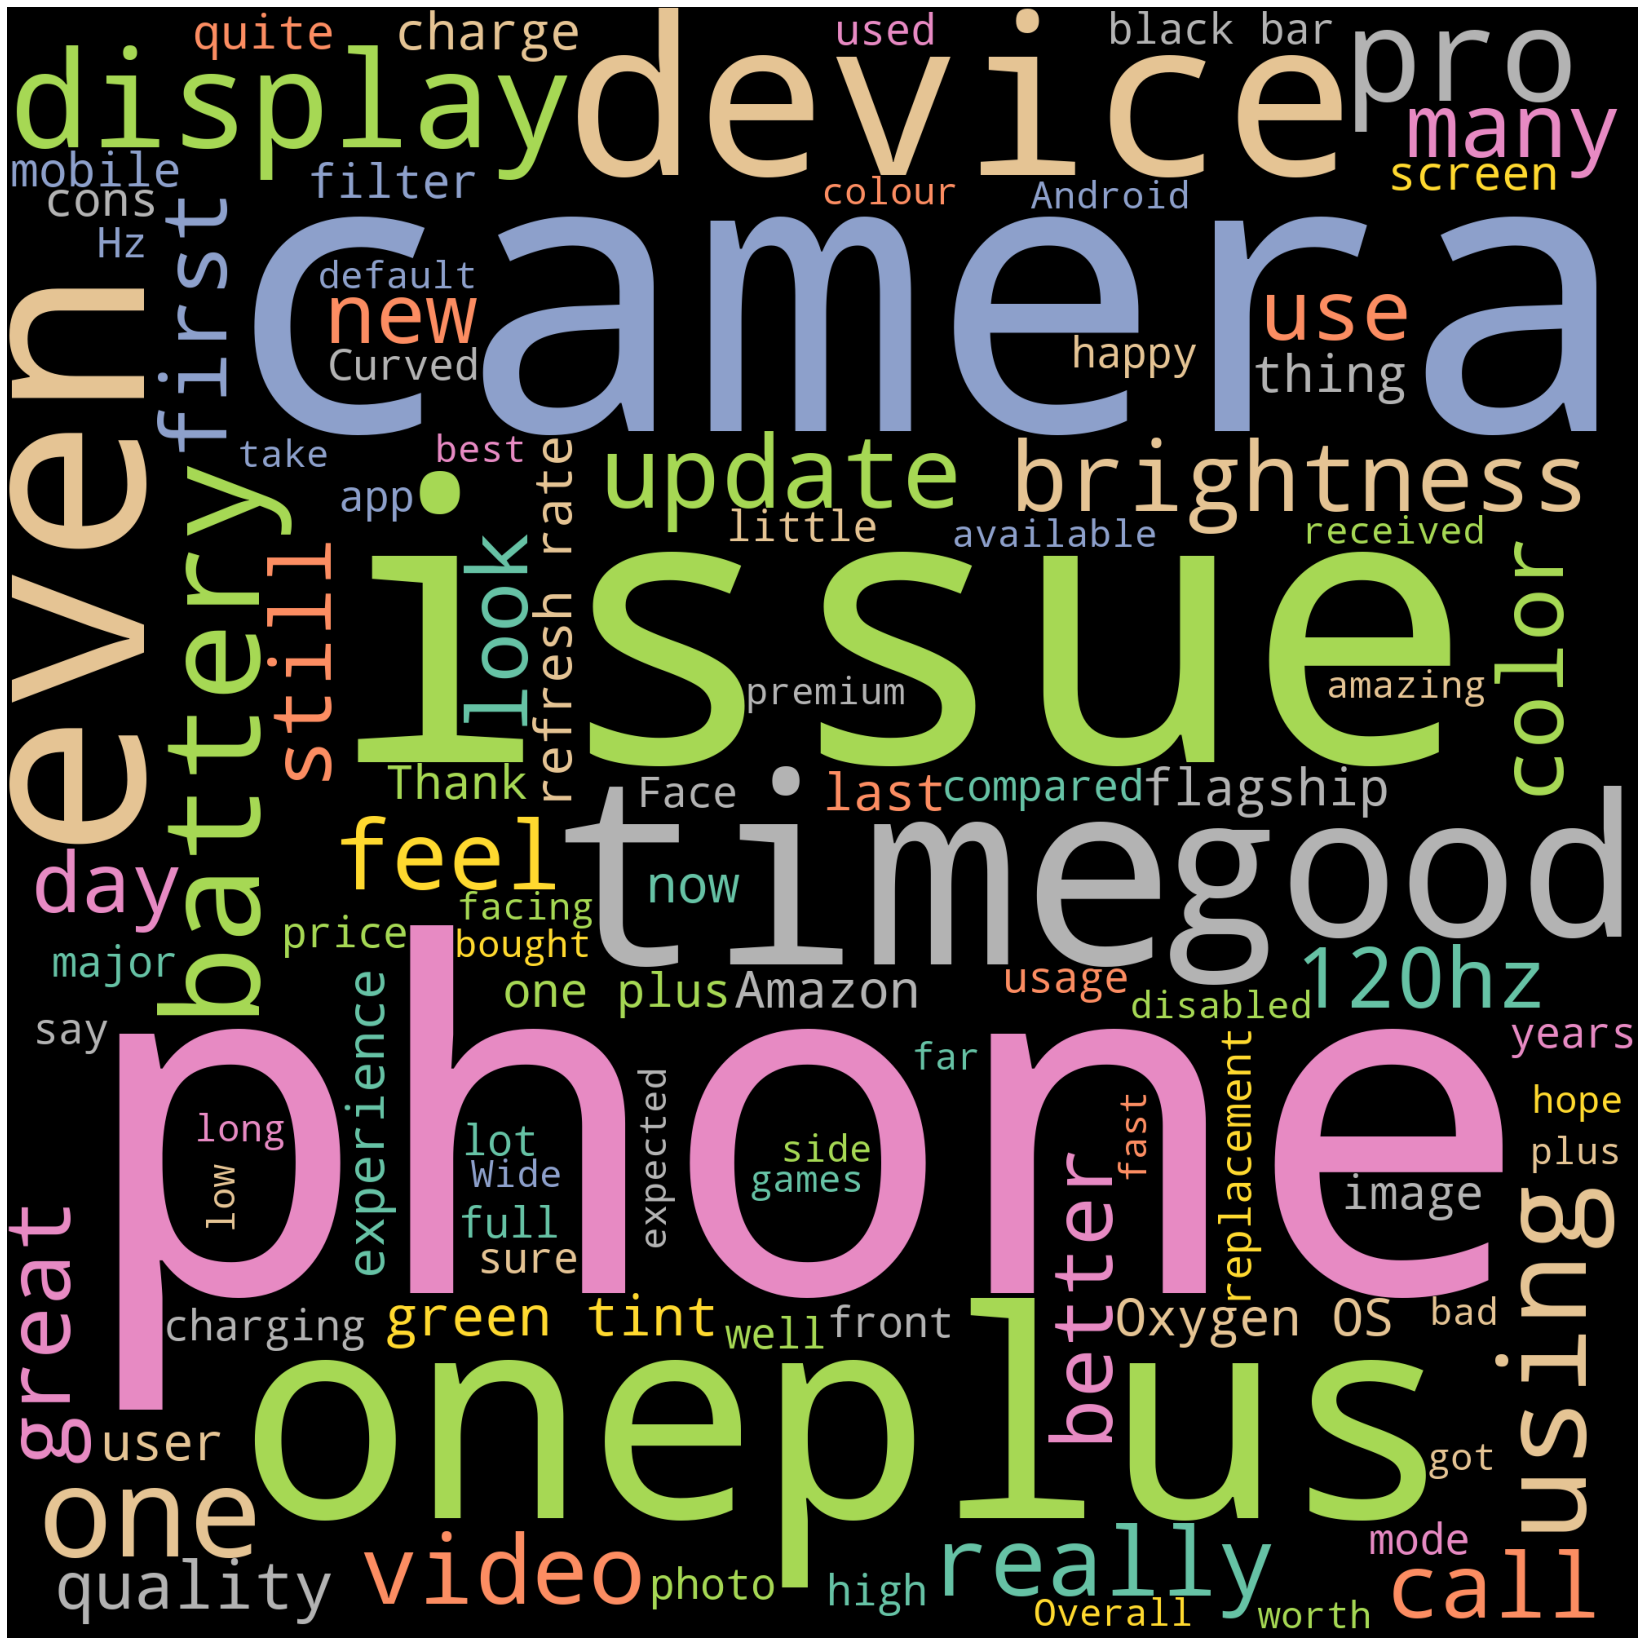

In [42]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 2000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(rev_text)

plot_cloud(wordcloud)